## fashion mnist vgg
### 사용환경 : ubuntu jupyter notebook

In [2]:
import keras
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## data load

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## 데이터 확인

In [4]:
# 학습 셋 크기(shape) - 이미지 크기가 28x28 인 60,000 개의 학습 이미지 데이터, 60,000 개의 레이블
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [5]:
# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


In [6]:
# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9

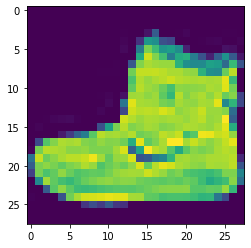

In [7]:
# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 0

# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]

# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

## 데이터 정규화

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## 데이터 나누기 train/test/validation

In [9]:
# 학습 셋 크기(shape) - 이미지 크기가 28x28 인 60,000 개의 학습 이미지 데이터, 60,000 개의 레이블
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# 레이블에 원-핫 인코딩 적용
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [10]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(filters=64, 
                        kernel_size=2, padding='same', 
                        activation='relu', 
                        input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               803072    
__________

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 116us/step - loss: 0.5587 - acc: 0.7958 - val_loss: 0.4002 - val_acc: 0.8660

Epoch 00001: val_loss improved from inf to 0.40022, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 3s 53us/step - loss: 0.4006 - acc: 0.8554 - val_loss: 0.3391 - val_acc: 0.8848

Epoch 00002: val_loss improved from 0.40022 to 0.33908, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 3s 56us/step - loss: 0.3656 - acc: 0.8679 - val_loss: 0.3384 - val_acc: 0.8828

Epoch 00003: val_loss improved from 0.33908 to 0.33839, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 5s 85us/step - loss: 0.3422 - acc: 0.8753 - val_loss: 0.3077 - val_acc: 0.9010

Epoch 00004: val_loss improved from 0.33839 to 0.30769, saving model to model.weights.best.hdf5
Epoch 5/10
55000/5

## 가장 높은 검증 정확도의 모델 불러오기

In [19]:
# 가장 높은 검증 정확도의 가중치 불러오기
model.load_weights('model.weights.best.hdf5')

In [21]:
# 테스트 셋으로 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score)


 Test accuracy: [0.2751033737897873, 0.9024]


## 예측값 시각화

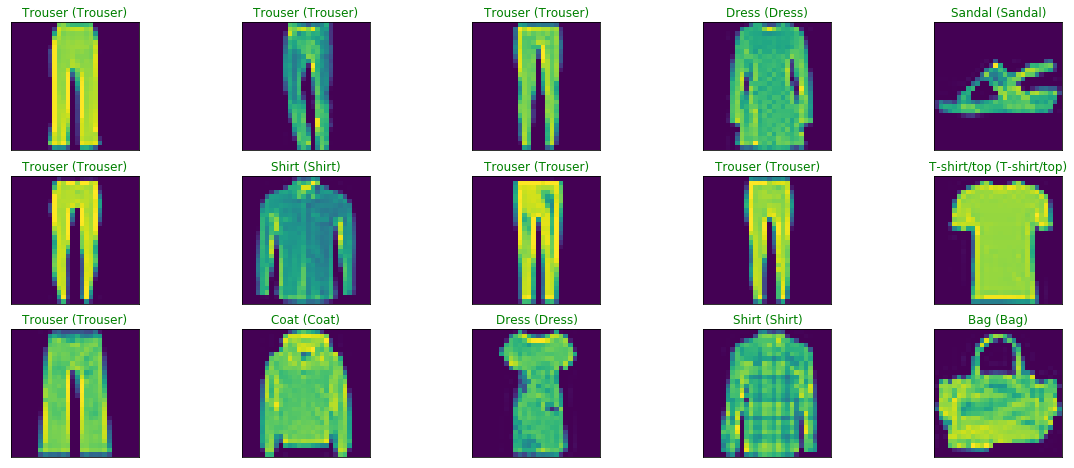

In [22]:
# y_hat은 test 데이터셋 예측
y_hat = model.predict(x_test)

# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index])) # 각각의 이미지를 보여줌
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index]) # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))